In [1]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
puidata = os.getenv("PUIDATA")
if puidata is None:
    os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")
    puidata = os.getenv("PUIDATA")

In [3]:
# download 201411 citibike data

#! curl -O https://s3.amazonaws.com/tripdata/201411-citibike-tripdata.zip
#! mv 201411-citibike-tripdata.zip $PUIDATA
#! unzip $PUIDATA/201411-citibike-tripdata.zip 
#! mv 201411-citibike-tripdata.csv $PUIDATA

In [4]:
df = pd.read_csv(os.getenv("PUIDATA") + '/201411-citibike-tripdata.csv')
df.head()

df['date'] = pd.to_datetime(df['starttime'])

In [5]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

## The number of old people who use citi bike is less than the number of young people 

# _$H_0$_ :  $Age\_above\_45_{\mathrm{count\_day}} >= {Age\_under\_45_{\mathrm{count\_day}}}$

# _$H_1$_ :  $Age\_above\_45_{\mathrm{count\_day}} < {Age\_under\_45_{\mathrm{count\_day}}}$

## I will use a significance level  $\alpha=0.05$

### which means i want the probability of getting a result at least as significant as mine to be less then 5%

In [6]:
df.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'gender'], axis=1, inplace=True)

In [7]:
df.head()

,birth year,date
0,1983.0,2014-11-01 00:00:11
1,1980.0,2014-11-01 00:00:11
2,1981.0,2014-11-01 00:00:38
3,1982.0,2014-11-01 00:00:49
4,1979.0,2014-11-01 00:00:56


In [8]:
df['age'] = 2018 - df['birth year']
df.head()

,birth year,date,age
0,1983.0,2014-11-01 00:00:11,35.0
1,1980.0,2014-11-01 00:00:11,38.0
2,1981.0,2014-11-01 00:00:38,37.0
3,1982.0,2014-11-01 00:00:49,36.0
4,1979.0,2014-11-01 00:00:56,39.0


In [9]:
df.drop(['birth year'], axis=1, inplace=True)

In [10]:
df.head()

,date,age
0,2014-11-01 00:00:11,35.0
1,2014-11-01 00:00:11,38.0
2,2014-11-01 00:00:38,37.0
3,2014-11-01 00:00:49,36.0
4,2014-11-01 00:00:56,39.0


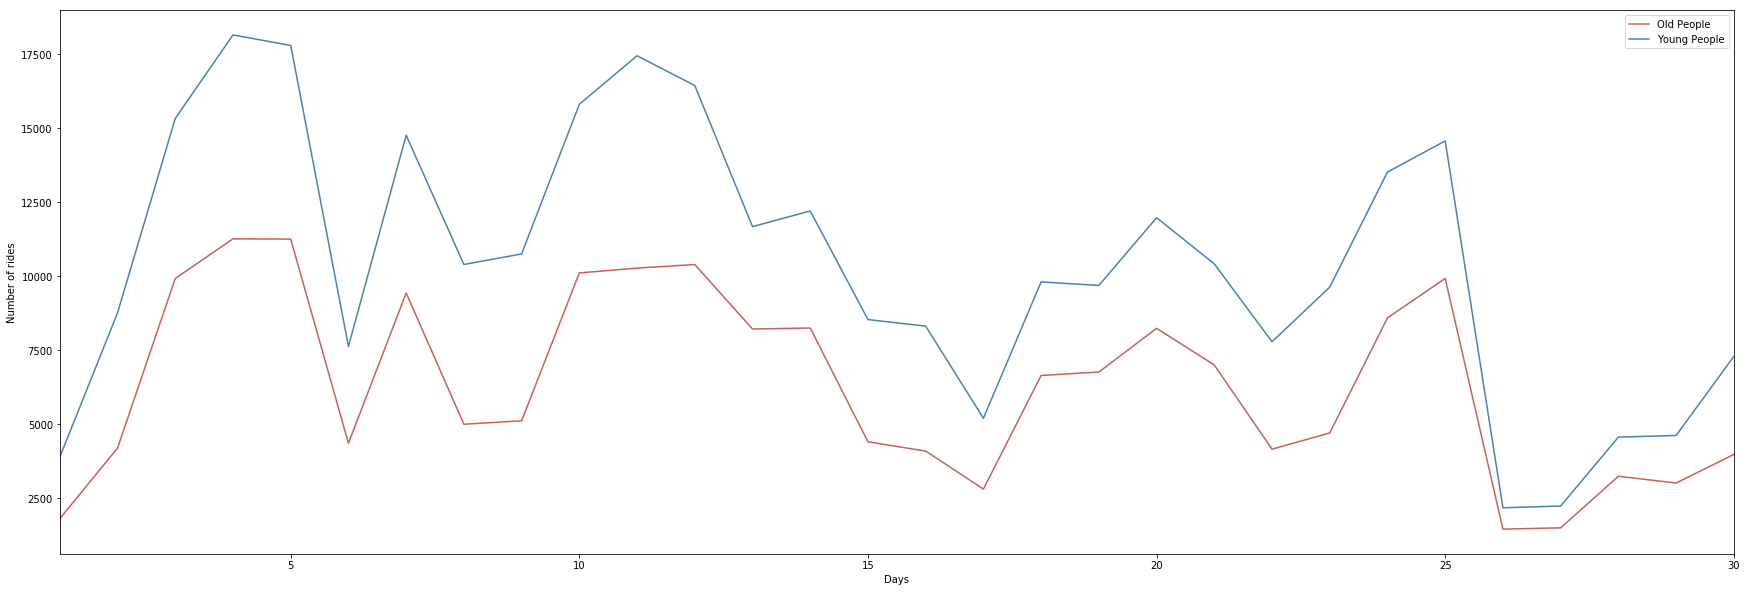

In [11]:
fig = pl.figure(figsize(30,10))

(df['date'][df['age'] >= 45].groupby([df['date'].dt.day]).count()).plot(kind = 'line', color = 'IndianRed', label = 'Old People')
ax = (df['date'][df['age'] < 45].groupby([df['date'].dt.day]).count()).plot(kind = 'line', color = 'SteelBlue', label = 'Young People')

ax.set_ylabel ("Number of rides")
ax.set_xlabel ("Days")
pl.legend()

## Figure 1
Here is the line graph about the number of old (age>=45) and young (age<45) people riding citi bike through 11.2014, which shows by days. I use this figure to find the difference between the number of old and young people riding citi bike. From this figure, we can see that the number of young people who ride citi bike in 11.2014 is higher than the number of old people through the whole month.

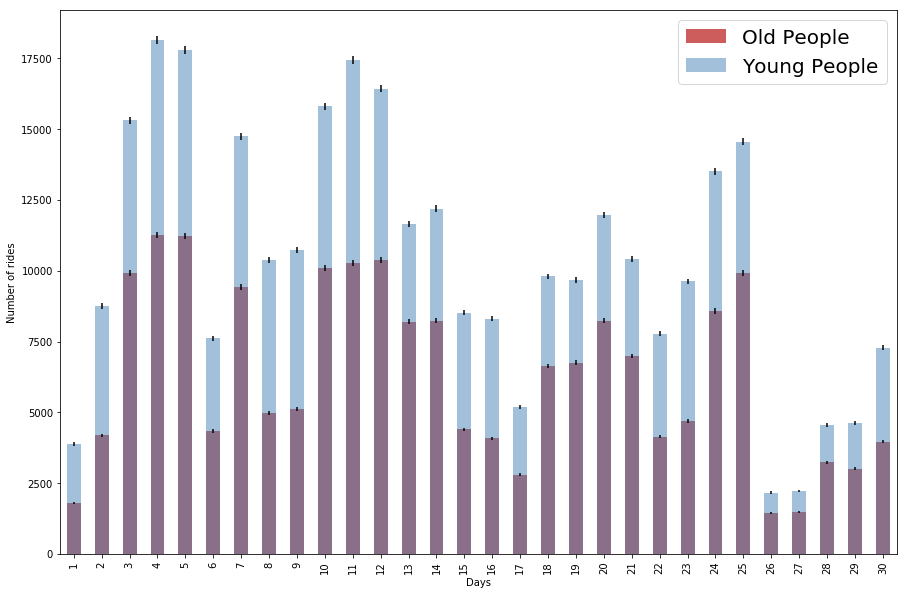

In [12]:
fig=pl.figure(figsize(15,10))

counts_w = (df['date'][df['age'] >= 45].groupby([df['date'].dt.day]).count())
norm_w = 1
error_w = np.sqrt(counts_w)
ax=((counts_w) / norm_w).plot(kind="bar",color='IndianRed',  yerr=[
            ((error_w) / norm_w, (error_w) / norm_w)], label='Old People')


counts_m = (df['date'][df['age'] < 45].groupby([df['date'].dt.day]).count())
norm_m = 1
error_m=np.sqrt(counts_m)
((counts_m) / norm_m).plot(kind="bar", alpha=0.5, yerr=[((error_m) / norm_m, (error_m) / norm_m)], 
                           color='SteelBlue', label='Young People')
ax.set_ylabel ("Number of rides")
ax.set_xlabel ("Days")
pl.legend(['Old People','Young People'],fontsize=20)


## Figure 2
Here is the  histogram about the number of old (age>=45) and young (age<45) people riding citi bike through 11.2014, which shows by days. I use this figure to find the difference between the number of old and young people riding citi bike and consider about the error on the count statistics, which shows on the figure. From this figure, we can see that even considering about the error on the count statistics, the number of young people who ride citi bike in 11.2014 is still much higher than the number of old people through the whole month.